In [14]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

In [15]:
dataset = load_breast_cancer()

In [16]:
data_x = pd.DataFrame(dataset.data,columns=dataset.feature_names)
data_y = pd.DataFrame(dataset.target,columns=['target']).as_matrix().ravel()

In [17]:
model = RandomForestRegressor()
model.fit(data_x,data_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

モデルの決定係数
0.9689502404735479
各特徴量の重要性
[1.19402721e-03 2.00159164e-02 5.15312873e-03 7.02205820e-03
 2.64964609e-03 0.00000000e+00 4.25393163e-03 2.88160343e-01
 2.82795213e-04 2.66886129e-03 9.28418652e-03 4.64607427e-03
 1.63733637e-03 3.10249070e-02 3.04681841e-03 2.02335995e-03
 4.22341972e-03 1.29519760e-03 1.02566876e-03 1.91494055e-03
 5.16868240e-03 1.83146918e-02 1.52082190e-01 6.69239964e-02
 1.06010814e-02 4.13454221e-03 2.87698197e-02 3.15637636e-01
 2.69562563e-03 4.14911829e-03]


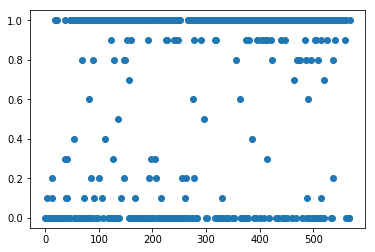

In [18]:
print('モデルの決定係数')
print(model.score(data_x,data_y))

print('各特徴量の重要性')
print(model.feature_importances_)

plt.plot(model.predict(data_x), 'o')
plt.show()

In [328]:
from sklearn.ensemble import RandomForestClassifier

In [450]:
forest = RandomForestClassifier(n_estimators=200, min_samples_split=15, max_depth=3, max_features=None)
forest.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [563]:
dataset = pd.read_csv("correlation.txt",header=None)

In [564]:
#print(dataset)


In [577]:
X = dataset.iloc[:,2:26]
y = dataset.iloc[:,1]
Xtrain = dataset.iloc[ 0:90,2:26]
ytrain = dataset.iloc[ 0:90,1]
Xtest  = dataset.iloc[90:135,2:26]
ytest  = dataset.iloc[90:135,1]

In [578]:
forest = RandomForestClassifier(n_estimators=200, min_samples_split=5, max_depth=8, max_features=None)
forest.fit(Xtrain, ytrain)
ytrain_pred = forest.predict(Xtrain)
ytest_pred  = forest.predict(Xtest)

In [579]:
#print(ytrain)
#print(ytrain_pred)

In [580]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytrain,ytrain_pred)
tr_cm = cm[0][0]+cm[1][1]+cm[2][2]
accuracy = (tr_cm)/(cm[0][0] + cm[0][1] + cm[0][2] + cm[1][0] + cm[1][1] + cm[1][2] + cm[2][0] + cm[2][1] + cm[2][2])
print(accuracy)

1.0


In [581]:
#print(ytest)
#print(ytest_pred)

In [582]:
cm = confusion_matrix(ytest,ytest_pred)
tr_cm = cm[0][0]+cm[1][1]+cm[2][2]
accuracy = (tr_cm)/(cm[0][0] + cm[0][1] + cm[0][2] + cm[1][0] + cm[1][1] + cm[1][2] + cm[2][0] + cm[2][1] + cm[2][2])
print(accuracy)

0.28888888888888886


In [594]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = [{'kernel':('rbf'), 'C':np.logspace(-4, 4, 9), 'gamma':np.logspace(-4, 4, 9)},
              {'kearnel':('rbf'), 'C':np.logspace(-4, 4, 9)} ]
clf = svm.SVC()
clf.fit(Xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [595]:
ytrain_pred_svm = clf.predict(Xtrain)

In [596]:
cm = confusion_matrix(ytrain,ytrain_pred_svm)
tr_cm = cm[0][0]+cm[1][1]+cm[2][2]
accuracy = (tr_cm)/(cm[0][0] + cm[0][1] + cm[0][2] + cm[1][0] + cm[1][1] + cm[1][2] + cm[2][0] + cm[2][1] + cm[2][2])
print(accuracy)

0.7111111111111111


In [597]:
ytest_pred_svm = clf.predict(Xtest)
cm = confusion_matrix(ytest,ytest_pred_svm)
tr_cm = cm[0][0]+cm[1][1]+cm[2][2]
accuracy = (tr_cm)/(cm[0][0] + cm[0][1] + cm[0][2] + cm[1][0] + cm[1][1] + cm[1][2] + cm[2][0] + cm[2][1] + cm[2][2])
print(accuracy)

0.3111111111111111
